## Setup

<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1yu5U0X0LNqQ6sQyFcPMlWnVj2D6eWV7m?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [9]:
# Python ≥3.5 is required
import sys

In [10]:
# Scikit-Learn ≥0.20 is required
import sklearn

## Get the Data

The function below merges the OECD's life satisfaction data and the IMF's GDP per capita data. We have discussed this example in class.

In [11]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

Fetch the files in datasets/lifesat

In [12]:
import os
datapath = os.path.join("datasets", "lifesat", "")

[Uncomment the code] Code below plots pretty figures directly within Jupyter


In [13]:
#matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Download the data

In [14]:
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

# Fill in the missing code


                 GDP per capita  Life satisfaction
Country                                           
Russia                 9054.914                6.0
Turkey                 9437.372                5.6
Hungary               12239.894                4.9
Poland                12495.334                5.8
Slovak Republic       15991.736                6.1
Estonia               17288.083                5.6
Greece                18064.288                4.8
Portugal              19121.592                5.1
Slovenia              20732.482                5.7
Spain                 25864.721                6.5
Korea                 27195.197                5.8
Italy                 29866.581                6.0
Japan                 32485.545                5.9
Israel                35343.336                7.4
New Zealand           37044.891                7.3 



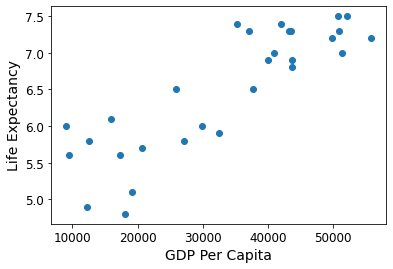



Predicted value for Cyprus [[5.96242338]]


In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model as lint

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
print(country_stats.head(15) , "\n")

X = country_stats.iloc[:,:-1].values
Y = country_stats.iloc[:,-1].values
Y= Y.reshape(-1,1)

#print(X)
#print(Y)

# Visualize the data
plt.scatter(X,Y)
plt.xlabel("GDP Per Capita")
plt.ylabel("Life Expectancy")
plt.show()

# Select a linear model
model = lint.LinearRegression()

# Train the model
model.fit(X,Y)


# Make a prediction for Cyprus
X_new = [[22587]]
#model.predict(X)

print("\n")
print("Predicted value for Cyprus", model.predict(X_new)) # outputs [[ 5.96242338]]

[Update] Replace the Linear Regression model with k-Nearest Neighbors (in this example, k = 3)

In [62]:
# Select a 3-Nearest Neighbors regression model
import sklearn.neighbors as knn
model1 = knn.KNeighborsClassifier(n_neighbors = 3)

# Train the model
model.fit(X,Y)

# Make a prediction for Cyprus
x_new1 = np.array([[22587.0]])
model.predict(x_new1)

array([[5.96242338]])

## DONE